# Convolution Autoencoder Using MNIST Dataset

In [90]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [91]:
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / np.max(x_train), x_test / np.max(x_test) # This should be handled by the ImageDataGenerator
print(x_train.shape)

(60000, 28, 28)


## Define the model

In [120]:
# https://www.programcreek.com/python/example/89691/keras.layers.UpSampling2D
# https://datascience.stackexchange.com/questions/6107/what-are-deconvolutional-layers

#shape = (height, width, channel)
shape = (28, 28, 1)

model = tf.keras.models.Sequential([
    # encoder part of the model
    tf.keras.layers.Input(shape=shape),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPool2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPool2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPool2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPool2D((2,2), padding='same', name="enc"),

    
    # decoder part of the model
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.UpSampling2D((2,2)),
#     tf.keras.layers.Conv2D(shape[2], (3,3), activation="linear", padding='same', name='dec')
    tf.keras.layers.Conv2D(shape[2], (3,3), activation=tf.nn.sigmoid, padding='same', name='dec')
])

# model.compile(optimizer="adam", loss="mse", metrics=['acc'])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 4, 4, 16)        

In [130]:
# x_train = tf.keras.preproccessing.image.ImageDataGenerator(rescale=1/255)
# y_train = tf.keras.preproccessing.image.ImageDataGenerator(rescale=1/255)

# normalize intput data
x_train = x_train/np.max(x_train)
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0],28,28,1)

model.fit(x_train,x_train,epochs=10)

(60000, 28, 28, 1)
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.1061 - acc: 0.8114
Epoch 2/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0980 - acc: 0.8126
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0936 - acc: 0.8133
Epoch 4/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0907 - acc: 0.8136
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0886 - acc: 0.8139
Epoch 6/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0869 - acc: 0.8141
Epoch 7/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0855 - acc: 0.8142
Epoch 8/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0845 - acc: 0.8143
Epoch 9/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.0837 - acc: 0.8144
Epoch 10/10
60000/60000 [===============

In [131]:
x_test = x_test/np.max(x_test)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
model.evaluate(x_test,x_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.08207935070991516, 0.8134685]

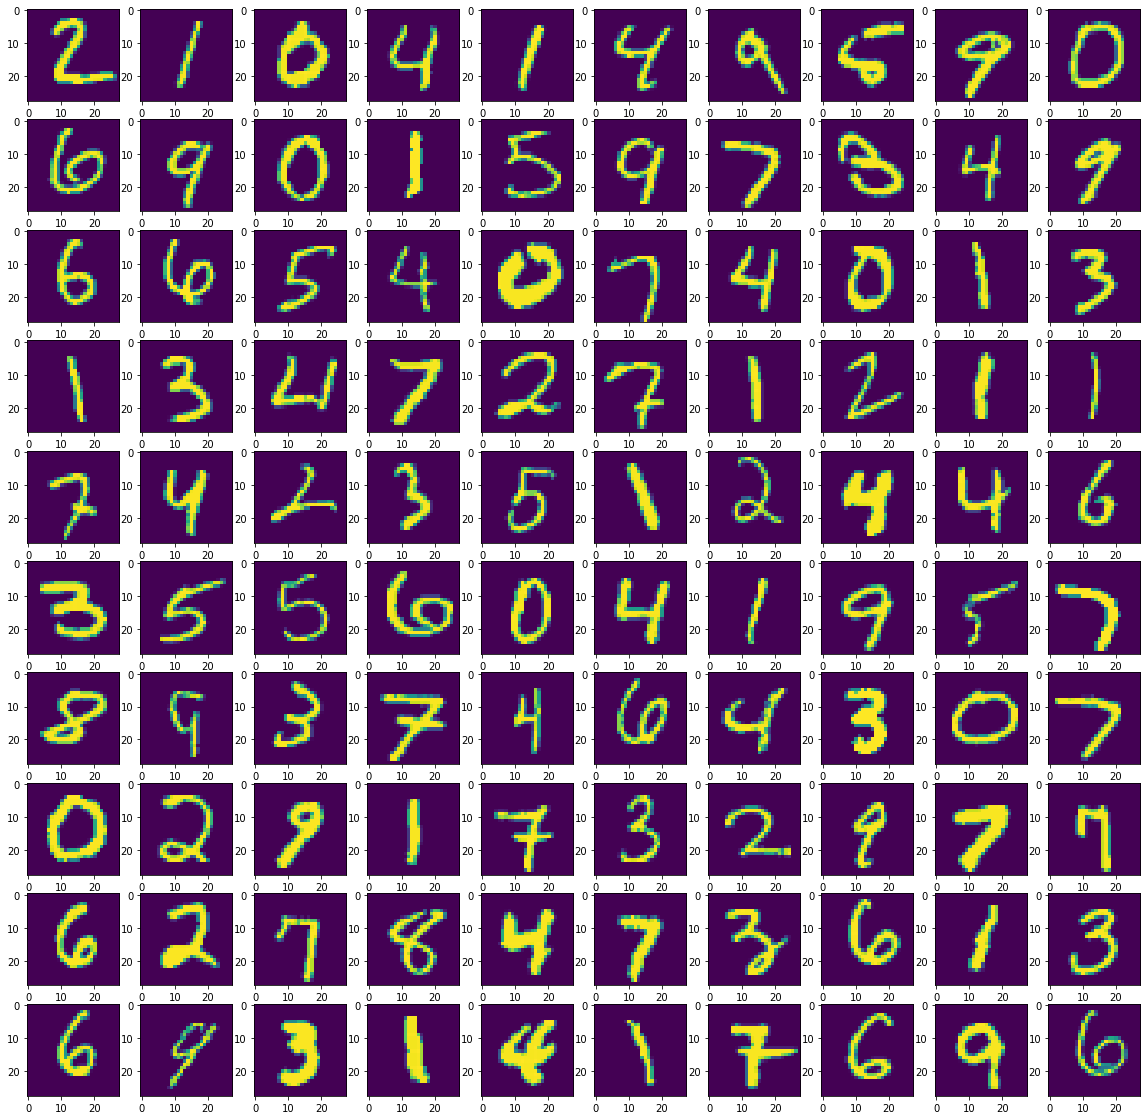

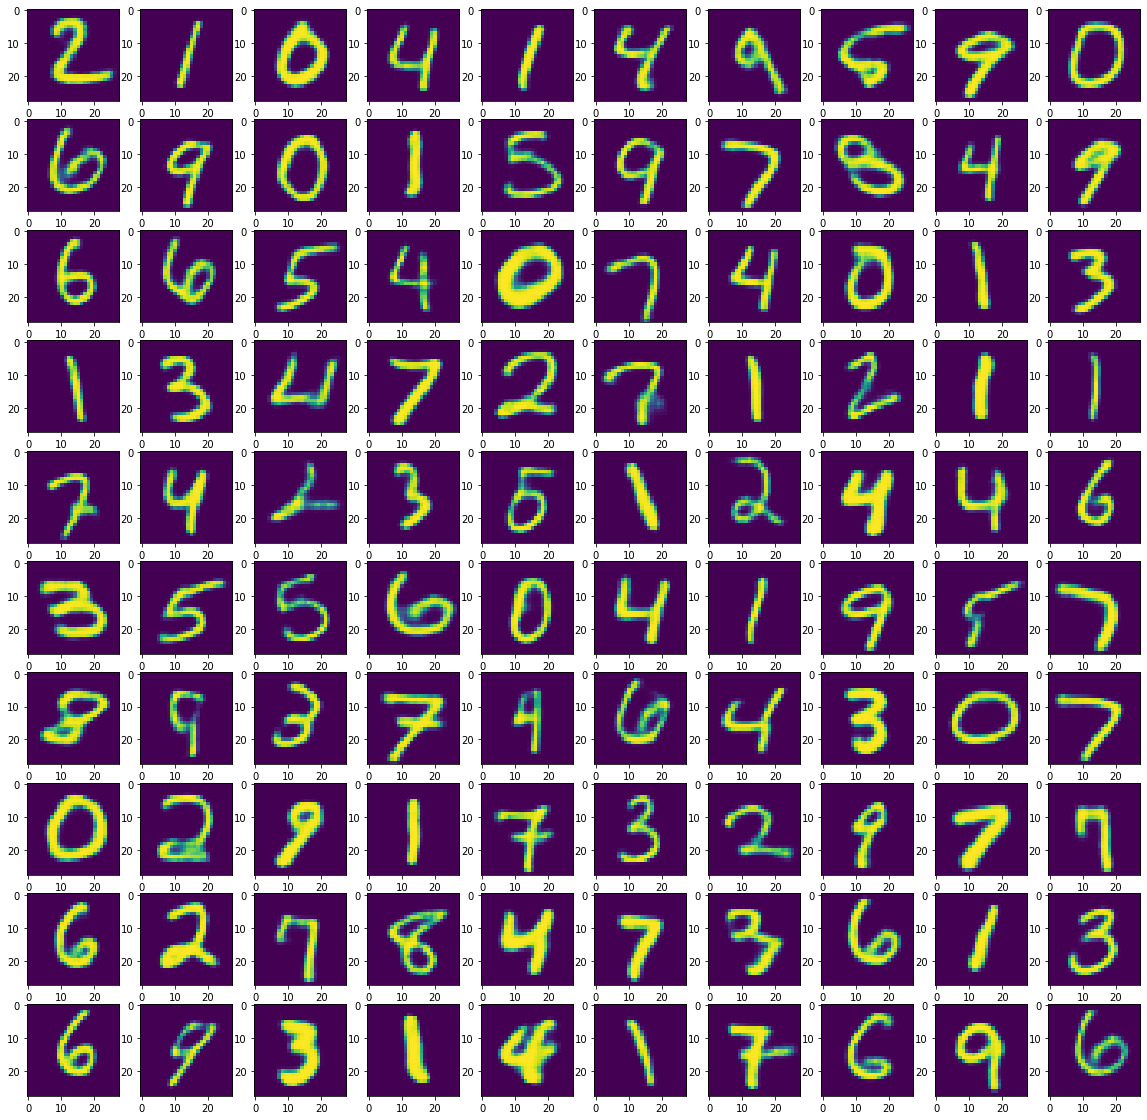

In [132]:
import matplotlib.pyplot as plt

cols, rows = 10, 10
fig=plt.figure(figsize=(20, 20))
for i in range(1, cols*rows +1):
    img = np.squeeze(x_test[i])
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)

plt.show()

fig=plt.figure(figsize=(20, 20))
for i in range(1, cols*rows +1):
    img = np.squeeze(model.predict(np.expand_dims(x_test[i], axis=0)))
    fig.add_subplot(rows, cols, i)
    plt.imshow(img)

plt.show()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 16)          0   

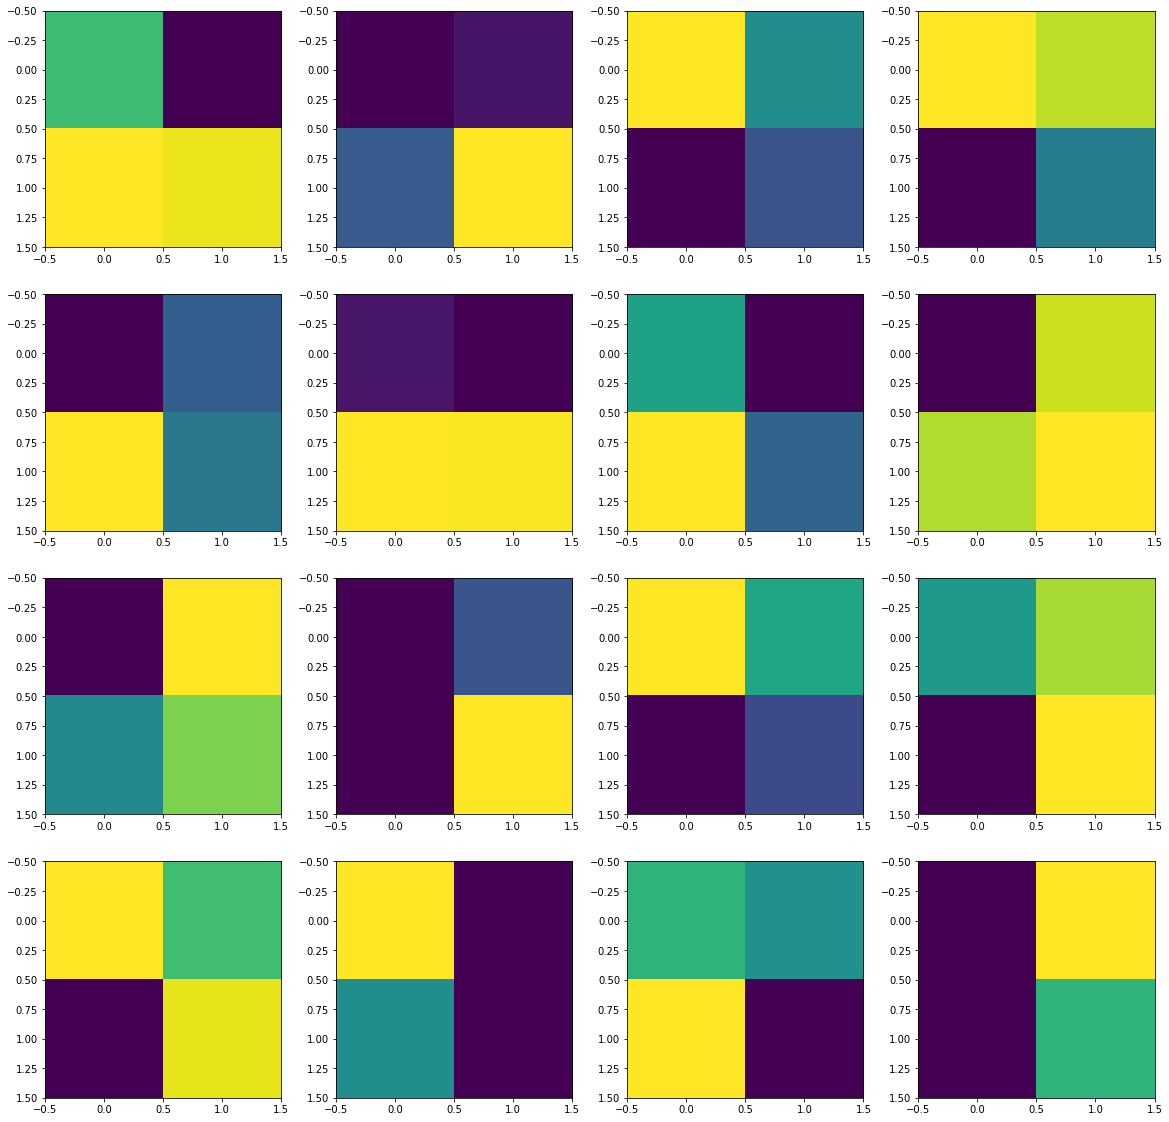

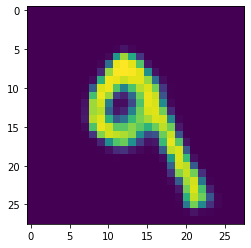

In [133]:
encoder = tf.keras.models.Model(inputs=model.inputs, outputs=model.get_layer("enc").output, name="encoder")
encoder.summary()

# create the decoder
# this is more difficult than the encoder since we cant remove the top layers from a preexisting model. Rather we make a new model and transfer the wieghts
decoder = tf.keras.models.Sequential([
    # decoder part of the model
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same', input_shape=(2,2,16)),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.UpSampling2D((2,2)),
    tf.keras.layers.Conv2D(shape[2], (3,3), activation=tf.nn.sigmoid, padding='same', name='dec')
], name="decoder")
decoder.summary()

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#set_weights
for i, layer in enumerate(decoder.layers):
    layer.set_weights(model.layers[8+i].get_weights())

# Test the encoder and print encoding
test_index = 7
encoding = encoder.predict(np.expand_dims(x_test[test_index], axis=0))
print("\nPrinting the encoder output for %i\n"%y_test[test_index])
fig = plt.figure(figsize=(20,20))
rows = 4
cols = 4
for i in range(0,encoding.shape[3]):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(np.squeeze(encoding)[:,:,i])
plt.show()

# Test the decoder and show the decoding
img = decoder.predict(encoding)
plt.imshow(np.squeeze(img))

In [134]:
decoder.save("mnist_decoder")

INFO:tensorflow:Assets written to: mnist_decoder/assets


In [135]:
encoder.save("mnist_encoder")

INFO:tensorflow:Assets written to: mnist_encoder/assets


In [136]:
model.save("mnist_full_encoder")

INFO:tensorflow:Assets written to: mnist_full_encoder/assets


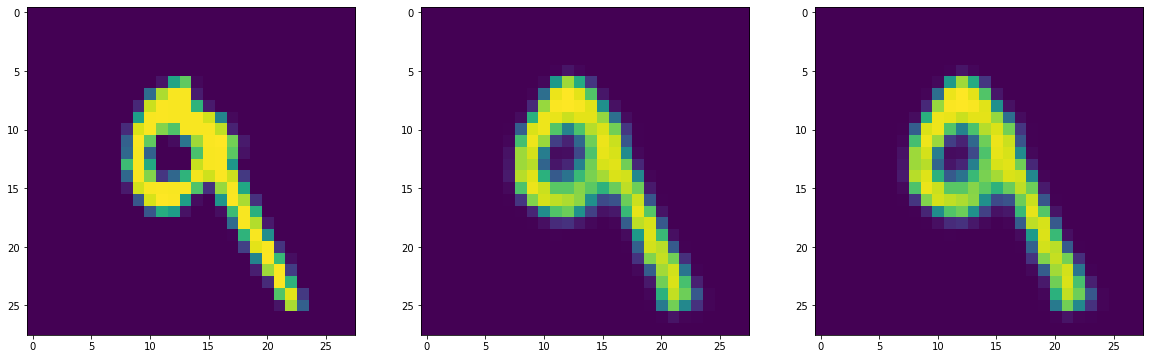

In [137]:
loaded_model = tf.keras.models.load_model("mnist_full_encoder")
loaded_encoder = tf.keras.models.load_model("mnist_encoder")
loaded_decoder = tf.keras.models.load_model("mnist_decoder")
img = loaded_model.predict(np.expand_dims(x_test[test_index], axis=0)) # for testing full model
encoding = loaded_encoder.predict(np.expand_dims(x_test[test_index], axis=0))
decoding = loaded_decoder.predict(encoding)

fig = plt.figure(figsize=(20,20))

fig.add_subplot(1, 3, 1)
plt.imshow(np.squeeze(x_test[test_index]))

fig.add_subplot(1, 3, 2)
plt.imshow(np.squeeze(img))

fig.add_subplot(1, 3, 3)
plt.imshow(np.squeeze(decoding))